# Data Preparation

## Data import and checking

In [1]:
import os
os.path.getsize("../data/raw/obesity.csv")


261534

In [2]:
import pandas as pd

df = pd.read_csv("../data/raw/obesity.csv")
obesity_df = df.copy()
obesity_df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
obesity_df.shape

(2111, 17)

In [4]:
obesity_df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
obesity_df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

#### By checking the data we udnersatnd that we will use column "NObeyesdad" as our Target.

In [6]:
obesity_df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [7]:
obesity_df.Age.max()

61.0

In [8]:
obesity_df.Height.max()

1.98

In [9]:
obesity_df.Weight.max()

173.0

In [10]:
obesity_df.family_history_with_overweight.unique()

array(['yes', 'no'], dtype=object)

In [11]:
obesity_df.FAVC.unique()

array(['no', 'yes'], dtype=object)

In [12]:
obesity_df.FCVC.unique()

array([2.      , 3.      , 1.      , 2.450218, 2.880161, 2.00876 ,
       2.596579, 2.591439, 2.392665, 1.123939, 2.027574, 2.658112,
       2.88626 , 2.714447, 2.750715, 1.4925  , 2.205439, 2.059138,
       2.310423, 2.823179, 2.052932, 2.596364, 2.767731, 2.815157,
       2.737762, 2.568063, 2.524428, 2.971574, 1.0816  , 1.270448,
       1.344854, 2.959658, 2.725282, 2.844607, 2.44004 , 2.432302,
       2.592247, 2.449267, 2.929889, 2.015258, 1.031149, 1.592183,
       1.21498 , 1.522001, 2.703436, 2.362918, 2.14084 , 2.5596  ,
       2.336044, 1.813234, 2.724285, 2.71897 , 1.133844, 1.757466,
       2.979383, 2.204914, 2.927218, 2.88853 , 2.890535, 2.530066,
       2.241606, 1.003566, 2.652779, 2.897899, 2.483979, 2.945967,
       2.478891, 2.784464, 1.005578, 2.938031, 2.842102, 1.889199,
       2.943749, 2.33998 , 1.950742, 2.277436, 2.371338, 2.984425,
       2.977018, 2.663421, 2.753752, 2.318355, 2.594653, 2.886157,
       2.967853, 2.619835, 1.053534, 2.530233, 2.8813  , 2.824

##### We treat Vegetables indicator as an average of the meals per day a person is including vegetables in their diet.

In [13]:
obesity_df.NCP.unique()

array([3.      , 1.      , 4.      , 3.28926 , 3.995147, 1.72626 ,
       2.581015, 1.600812, 1.73762 , 1.10548 , 2.0846  , 1.894384,
       2.857787, 3.765526, 3.285167, 3.691226, 3.156153, 1.07976 ,
       3.559841, 3.891994, 3.240578, 3.904858, 3.11158 , 3.590039,
       2.057935, 3.558637, 2.000986, 3.821168, 3.897078, 3.092116,
       3.286431, 3.592415, 3.754599, 3.566082, 3.725797, 3.520555,
       3.731212, 1.259803, 1.273128, 3.304123, 3.647154, 3.300666,
       3.535016, 1.717608, 2.884479, 3.626815, 1.473088, 3.16645 ,
       3.494849, 2.99321 , 2.127797, 3.90779 , 3.699594, 3.179995,
       1.075553, 3.238258, 3.804944, 1.630846, 3.762778, 3.371832,
       2.705445, 3.34175 , 2.217651, 2.893778, 3.502604, 3.998766,
       3.193671, 1.69608 , 2.812377, 1.612747, 1.082304, 1.882158,
       2.326233, 1.989398, 1.735493, 2.974568, 3.715118, 3.489918,
       3.378859, 3.263201, 3.994588, 3.24934 , 3.087544, 1.163666,
       3.409363, 3.281391, 3.98525 , 3.207071, 3.471536, 3.488

In [14]:
obesity_df.NCP.max()

4.0

##### We treat NCP indicator as an average meals per day a person is eating.

In [15]:
obesity_df.CAEC.unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [16]:
obesity_df.SMOKE.unique()

array(['no', 'yes'], dtype=object)

In [17]:
obesity_df.CH2O.max()

3.0

##### We treat Water indicator as an average water per day a person is drinking

In [18]:
obesity_df.SCC.unique()

array(['no', 'yes'], dtype=object)

In [19]:
obesity_df.FAF.unique()

array([0.      , 3.      , 2.      , ..., 1.414209, 1.139107, 1.026452])

In [20]:
obesity_df.FAF.max()

3.0

##### We treat FAF (exercise) indicator as the average hours of workout per day a person is eating.

In [21]:
obesity_df.TUE.unique()

array([1.      , 0.      , 2.      , ..., 0.646288, 0.586035, 0.714137])

In [22]:
obesity_df.TUE.max()

2.0

##### We treat TUE (TECH SCREENS) indicator as the average hours of screentime per day a person is spending.

In [23]:
obesity_df.CALC.unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [24]:
obesity_df.MTRANS.unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [25]:
obesity_df.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

## Exploratory Data Analysis (EDA): Which features are associated with obesity risk?

In this section, we explore how input features relate to the target variable (obesity level). 
The goal is to identify patterns and potential risk factors, assess class balance, and motivate later modeling choices.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
target_col = "NObeyesdad"


Dataset shape: (2111, 17)

Missing values per column:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


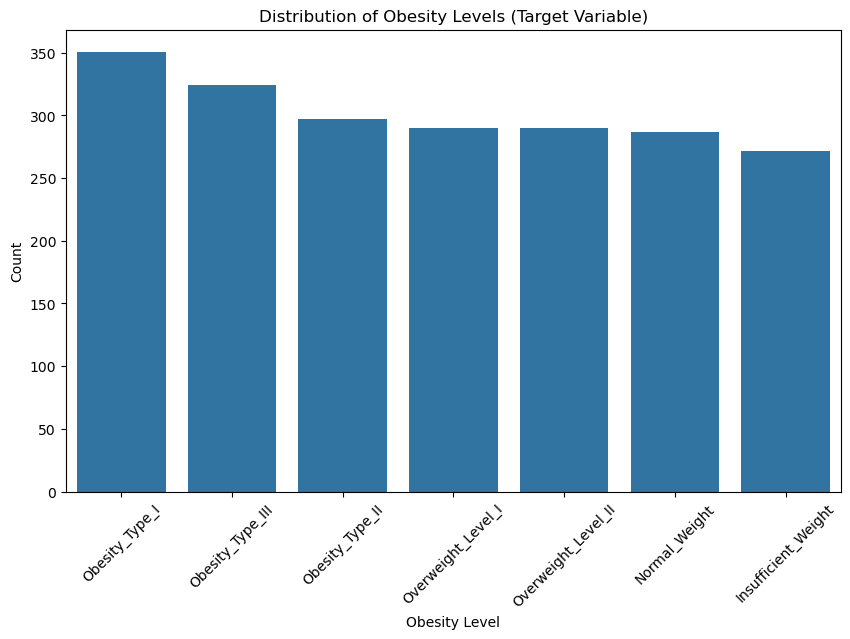


Target distribution (%)
NObeyesdad
Obesity_Type_I         16.63
Obesity_Type_III       15.35
Obesity_Type_II        14.07
Overweight_Level_I     13.74
Overweight_Level_II    13.74
Normal_Weight          13.60
Insufficient_Weight    12.88
Name: proportion, dtype: float64


In [27]:
# Dataset overview
print("Dataset shape:", obesity_df.shape)

# Check missing values
print("\nMissing values per column:")
print(obesity_df.isnull().sum())

# Target distribution
plt.figure(figsize=(10,6))
sns.countplot(data=obesity_df, x=target_col, order=obesity_df[target_col].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Obesity Levels (Target Variable)")
plt.ylabel("Count")
plt.xlabel("Obesity Level")
plt.show()

# Display target distribution in percentages
target_percent = obesity_df[target_col].value_counts(normalize=True) * 100
print("\nTarget distribution (%)")
print(target_percent.round(2))


**Observation:**  
The target variable is well balanced across all obesity categories, with each class representing a similar proportion of the dataset. Therefore, no resampling or class-balancing techniques are required before modeling.


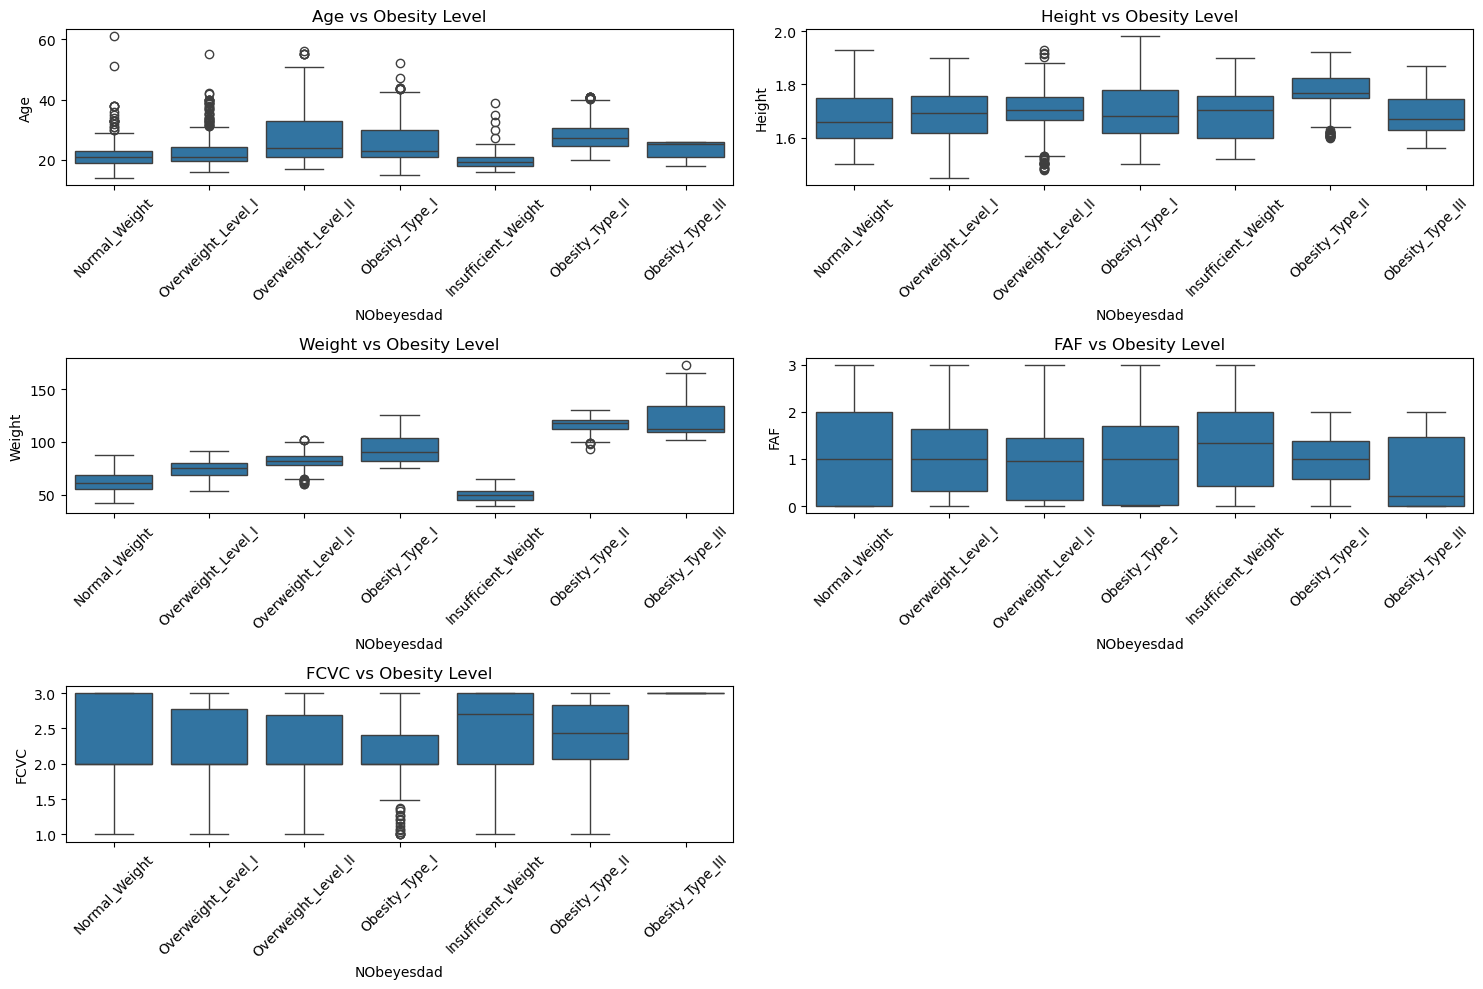

In [28]:
# List of numerical features
numerical_features = ["Age", "Height", "Weight", "FAF", "FCVC"]

plt.figure(figsize=(15,10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=obesity_df, x=target_col, y=feature)
    plt.xticks(rotation=45)
    plt.title(f"{feature} vs Obesity Level")

plt.tight_layout()
plt.show()


**Observation:**  
Boxplots show how numerical features vary across obesity levels. Differences in Weight and Height clearly separate obesity categories, while lower physical activity (FAF) and lower vegetable consumption (FCVC) tend to be associated with higher obesity levels.


In [29]:
cat_cols = [
    "Gender",
    "family_history_with_overweight",
    "FAVC",
    "CAEC",
    "SMOKE",
    "SCC",
    "CALC",
    "MTRANS",
]

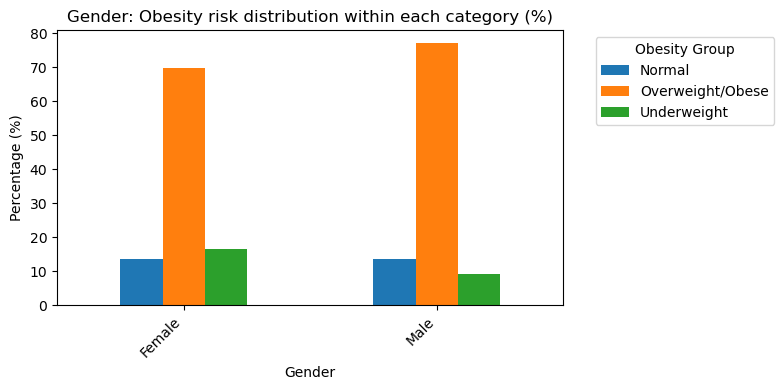

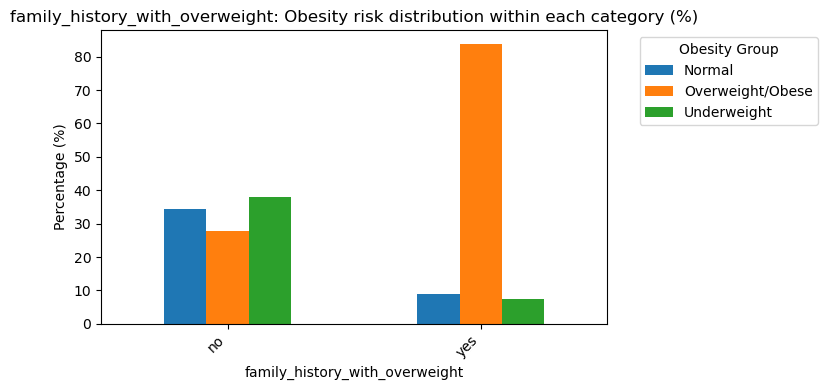

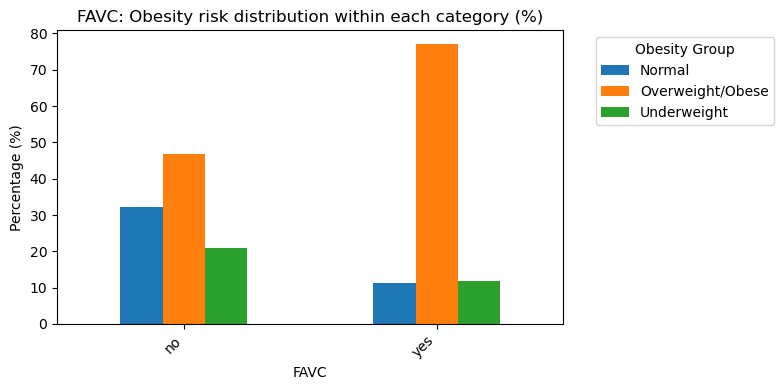

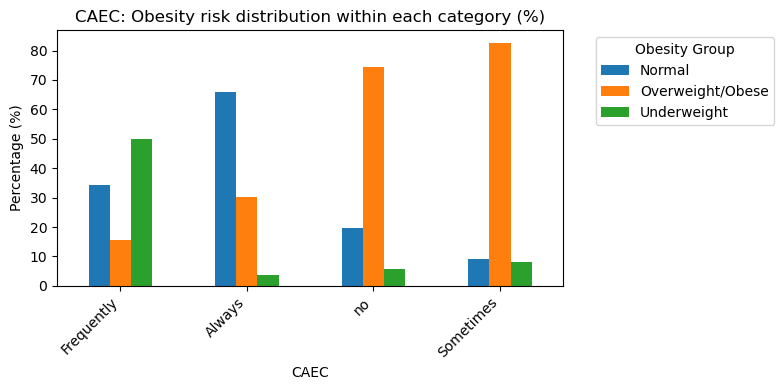

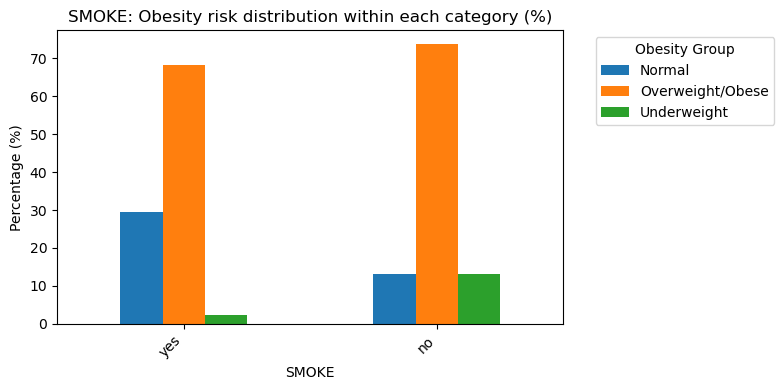

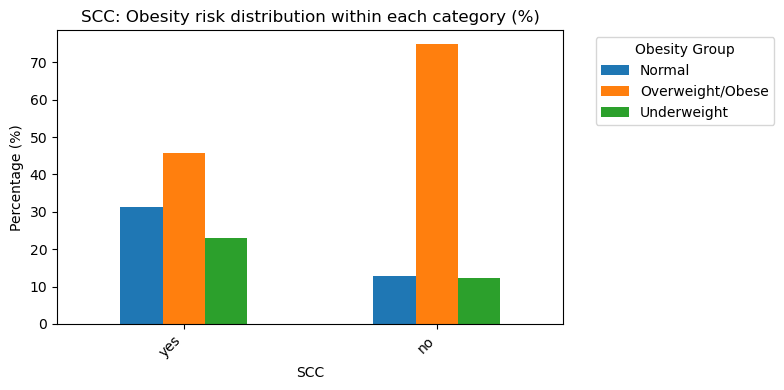

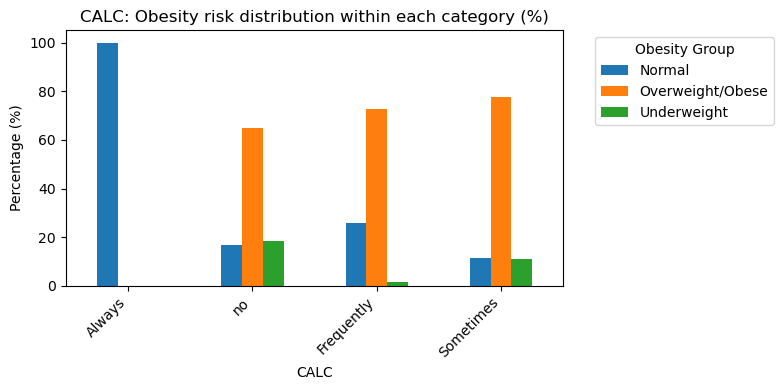

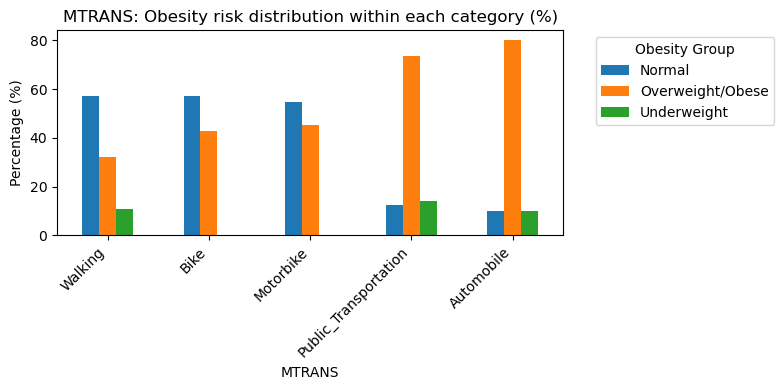

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Simplify target into 3 obesity risk groups for clearer visualization
obesity_groups = {
    "Insufficient_Weight": "Underweight",
    "Normal_Weight": "Normal",
    "Overweight_Level_I": "Overweight/Obese",
    "Overweight_Level_II": "Overweight/Obese",
    "Obesity_Type_I": "Overweight/Obese",
    "Obesity_Type_II": "Overweight/Obese",
    "Obesity_Type_III": "Overweight/Obese"
}

obesity_df["Obesity_Group"] = obesity_df[target_col].map(obesity_groups)

# Normalized (percentage) stacked bar plots for categorical features
for feature in cat_cols:
    # Create a normalized crosstab (row-wise percentages)
    ct = pd.crosstab(obesity_df[feature], obesity_df["Obesity_Group"], normalize="index") * 100
    
    # Order categories by % Overweight/Obese (from low to high) for readability
    if "Overweight/Obese" in ct.columns:
        ct = ct.sort_values("Overweight/Obese")
    
    ax = ct.plot(kind="bar", figsize=(8,4))
    plt.title(f"{feature}: Obesity risk distribution within each category (%)")
    plt.ylabel("Percentage (%)")
    plt.xlabel(feature)
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Obesity Group", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


**Observation:**  
To avoid misleading conclusions from raw counts, we visualize normalized percentages within each category. This highlights how the proportion of individuals in the Overweight/Obese group changes across categories, making associations with obesity risk easier to interpret.


In [31]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test between each categorical feature and the grouped obesity target
chi2_results = []

for feature in cat_cols:
    contingency_table = pd.crosstab(obesity_df[feature], obesity_df["Obesity_Group"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    chi2_results.append({
        "Feature": feature,
        "Chi2 Statistic": chi2,
        "p-value": p
    })

chi2_df = pd.DataFrame(chi2_results).sort_values("Chi2 Statistic", ascending=False)

chi2_df


,Feature,Chi2 Statistic,p-value
3,CAEC,649.293206,5.398077e-137
1,family_history_with_overweight,511.277809,9.493676e-112
7,MTRANS,131.653481,1.284707e-24
2,FAVC,111.074327,7.594801e-25
6,CALC,58.198350,1.044593e-10
5,SCC,41.398344,1.024386e-09
0,Gender,25.620285,2.732913e-06
4,SMOKE,12.510442,1.920401e-03


**Chi-Square Test Interpretation:**  
The Chi-Square test confirms strong statistical associations between several categorical features and obesity risk. Snacking frequency (CAEC) and family history of overweight show the highest dependency with obesity group categories, followed by transportation type (MTRANS) and frequent high-calorie food consumption (FAVC). All tested categorical variables present statistically significant p-values, indicating meaningful relationships with obesity risk.


## EDA Summary and Key Insights

From the exploratory analysis, several features show clear associations with obesity risk:

- **Weight and Height** strongly differentiate obesity categories, confirming their relevance for predicting obesity levels.
- **Lifestyle-related numerical variables**, such as physical activity frequency (FAF) and vegetable consumption (FCVC), show noticeable differences across obesity classes.
- **Categorical features** including snacking frequency (CAEC), family history of overweight, frequent high-calorie food consumption (FAVC), and transportation type (MTRANS) present strong associations with obesity risk. These relationships were confirmed both through normalized percentage visualizations and Chi-Square statistical testing.
- The **target variable is well balanced**, so no class rebalancing techniques are required.

Based on these observations, we proceed to preprocessing and modeling.


## Train - test split

In [32]:
target_col = "NObeyesdad"
X = obesity_df.drop(columns=[target_col])
y = obesity_df[target_col]

In [41]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## Normalization, Scaling, One-hot encoding

In [43]:
# first create a list of categorical
cat_cols = [
    "Gender",
    "family_history_with_overweight",
    "FAVC",
    "CAEC",
    "SMOKE",
    "SCC",
    "CALC",
    "MTRANS",
]

In [44]:
# then the numerical variables
num_cols = [c for c in X.columns if c not in cat_cols]

In [45]:
# build a BMI feature as a decent estsimator of obesity
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class BMICreator(BaseEstimator, TransformerMixin):
    def __init__(self, height_col="Height", weight_col="Weight"):
        self.height_col = height_col
        self.weight_col = weight_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        bmi = X[self.weight_col] / (X[self.height_col] ** 2)
        X["BMI"] = bmi
        return X


In [46]:
# preprocessing pipeline
# scaling numberical features and encoding categorical

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocess = Pipeline(
    steps=[
        ("bmi", BMICreator()),
        ("columns", ColumnTransformer(
            transformers=[
                ("num", StandardScaler(), num_cols + ["BMI"]),
                ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
            ]
        ))
    ]
)


## KNN pipeline

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline(steps=[("perp", preprocess), ("model", KNeighborsClassifier())])

In [48]:
knn.fit(X_train, y_train)

ValueError: could not convert string to float: 'Overweight/Obese'

## Evaluate model performance

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
y_pred = knn.predict(X_test)

print("Accuracy:", f"{accuracy_score(y_test, y_pred):.2f}")